In [2]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.8.0


In [3]:
# 값이 1인 배열 1000개를 만드려면?
test_list = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# tf.ones사용 constant 형식으로 나온다.
t1 = tf.ones(shape=(10))
print(type(t1))
print(t1)

# 100 * 3 2차원 배열 생성
t2 = tf.ones(shape=(10, 3))
print(t2)

# tf.ones에 의해 생성된 배열을 벡터라고 할 때 스칼라를 곱해주면?
t3 = 3 * tf.ones(shape=(10, 2))
print(t3)



Metal device set to: Apple M1
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor([1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], shape=(10,), dtype=float32)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(10, 3), dtype=float32)
tf.Tensor(
[[3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]], shape=(10, 2), dtype=float32)


2022-05-10 13:57:57.230167: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-10 13:57:57.230659: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
# 만약 동일한 벡터 구조를 가지고 싶다면?
test_list = [[1, 2, 3], [4, 5, 6]]

t1 = tf.Variable(test_list)
print(t1)

t2 = tf.ones(shape=(t1.shape))
print(t2)

# 더 깔끔하게 데이터 형태까지 따라간다.
t2 = tf.ones_like(t1)
print(t2)

# 마찬가지로 채우기 기능까지 가능
t3 = 3 * tf.ones_like(t1)
print(t3)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1 1 1]
 [1 1 1]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[3 3 3]
 [3 3 3]], shape=(2, 3), dtype=int32)


In [17]:
# 가중치나 편향값을 랜덤하게 할당할 때가 많음
t1 = tf.random.normal(shape=(3, 3))
print(t1)

# 만약 랜덤값을 고정하고 싶다면?
tf.random.set_seed(0) # 메서드를 통해 고정된 값으로 만들 수 있다.
t1 = tf.random.normal(shape=(3, 3))
print(t1)

tf.random.set_seed(0)
t1 = tf.random.normal(shape=(3, 3))
print(t1)

tf.random.set_seed(0)
t1 = tf.random.normal(shape=(3, 3))
print(t1)

tf.Tensor(
[[ 1.5971624   1.4010808   0.49972403]
 [-0.7916724  -0.8763026   0.7427098 ]
 [ 0.02194023 -0.03269842  1.39788   ]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[ 1.5110626   0.42292204 -0.41969493]
 [-1.0360372  -1.2368279   0.47027302]
 [-0.01397489  1.1888583   0.60253334]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[ 1.5110626   0.42292204 -0.41969493]
 [-1.0360372  -1.2368279   0.47027302]
 [-0.01397489  1.1888583   0.60253334]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[ 1.5110626   0.42292204 -0.41969493]
 [-1.0360372  -1.2368279   0.47027302]
 [-0.01397489  1.1888583   0.60253334]], shape=(3, 3), dtype=float32)


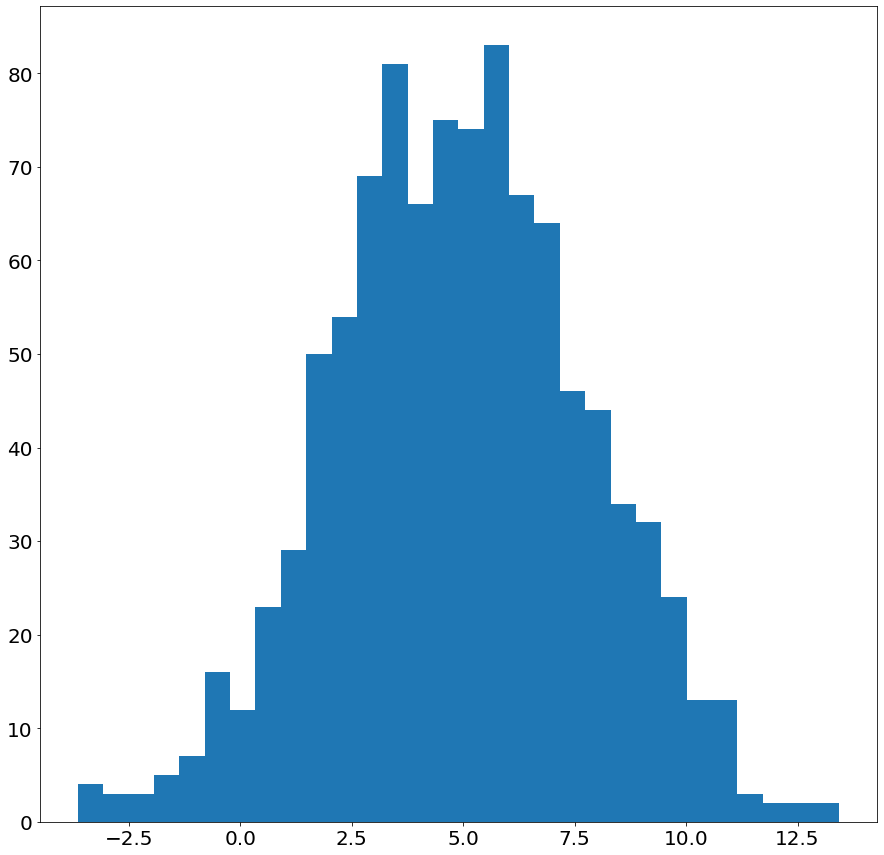

In [26]:
# 더 세부적으로 랜덤값 다루기
import matplotlib.pyplot as plt

t2 = tf.random.normal(mean=5, stddev=3, shape=(1000, )) # 평균이 5고 표준편차가 3인 1000개의 랜덤값

fig, ax = plt.subplots(figsize=(15, 15))
ax.hist(t2.numpy(), bins=30)

ax.tick_params(labelsize=20)


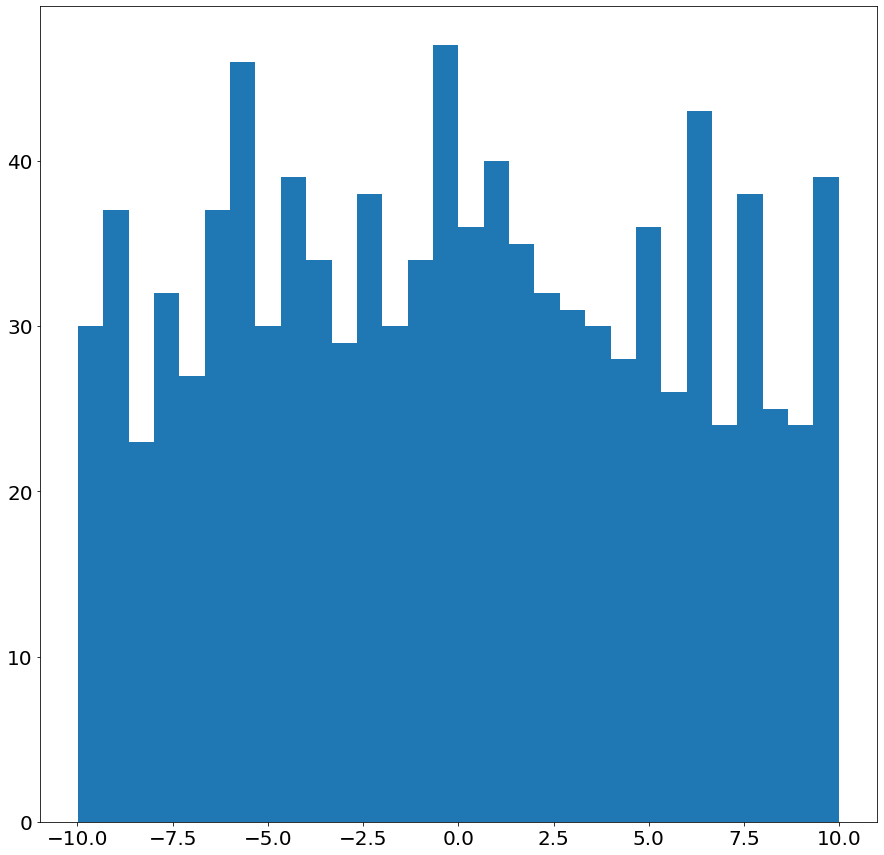

In [29]:
t2 = tf.random.uniform(shape=(1000, ), minval=-10, maxval=10) # 균일 분포에서 임의의 값 출력

fig, ax = plt.subplots(figsize=(15, 15))
ax.hist(t2.numpy(), bins=30)

ax.tick_params(labelsize=20)

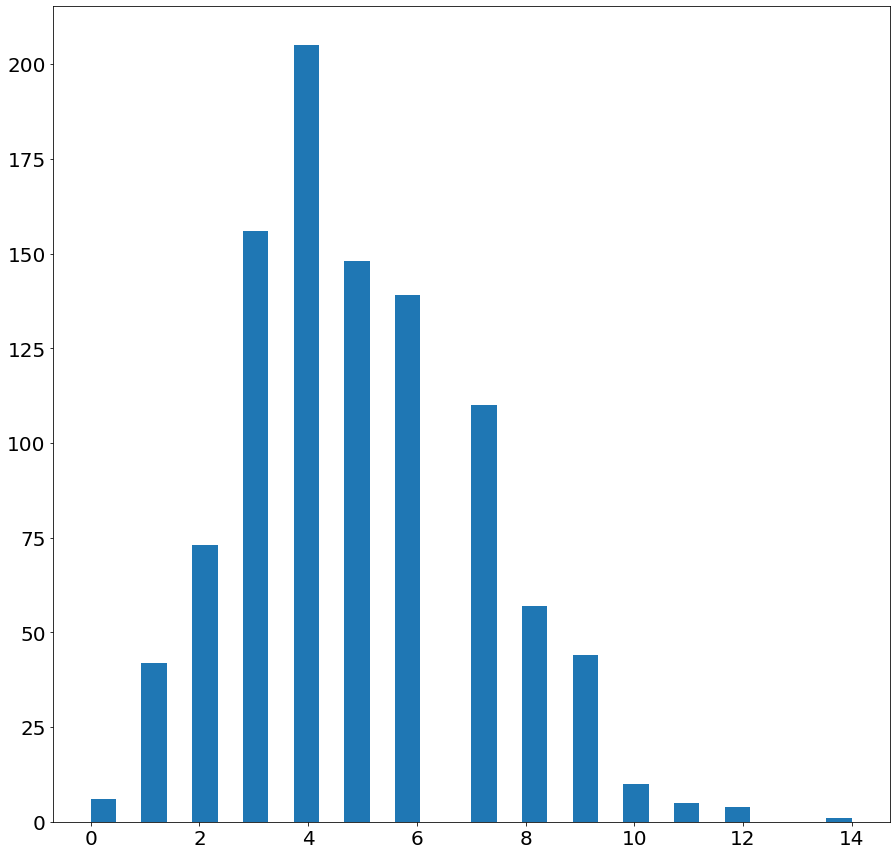

In [31]:
t2 = tf.random.poisson(shape=(1000, ), lam=5) # 포아송 분포

fig, ax = plt.subplots(figsize=(15, 15))
ax.hist(t2.numpy(), bins=30)

ax.tick_params(labelsize=20)

In [37]:
# 랜덤값에서 정보 뽑기


t1 = tf.random.normal(shape=(128, 128, 3))
print(type(t1))
print(t1.shape) # 구조 확인
print(t1.dtype) # 데이터 타입 확인하기

t2 = tf.Variable([1, 2, 3])
print(t2.shape) # 구조 확인
print(t2.dtype) # 데이터 타입 확인하기


<class 'tensorflow.python.framework.ops.EagerTensor'>
(128, 128, 3)
<dtype: 'float32'>
(3,)
<dtype: 'int32'>
